> NOTE: You should develop your own strategy to assess and verify the accuracy of your solution — without comparing results to built-in solvers or external code.





1. Consider the boundary value problem:

$-u'' = e^{\sin(x)}, \quad u(0)=0, \quad u(1)=0.$

*   Solve the problem and check the accuracy of your solutions.
*   Explore the limitation of accuracy: identify the smallest error you can achieve and explain what prevents further improvement.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#先把需要用到的value建好
def solve_bvp(N, f):
    h = 1.0 / (N + 1)
    x = np.linspace(h, 1 - h, N)

    # matrix for -u''
    A = np.zeros((N, N))
    np.fill_diagonal(A, 2)
    np.fill_diagonal(A[1:], -1)
    np.fill_diagonal(A[:,1:], -1)
    A = A / h**2

    b = f(x)
    u = np.linalg.solve(A, b)

    x_full = np.concatenate(([0], x, [1]))
    u_full = np.concatenate(([0], u, [0]))
    return x_full, u_full

拿已知的結果做初步確認，在此我們測試的exact solution是：

$u'' = 1, u(0)=u(1)=0$

其中
$u(x)=x(1-x)/2$


=== Test with known exact solution ===
N=  20, max error = 1.249e-16
N=  40, max error = 1.665e-16
N=  80, max error = 1.471e-15
N= 160, max error = 1.624e-15
N= 320, max error = 9.853e-15
N= 640, max error = 6.911e-15
N=1280, max error = 6.467e-14


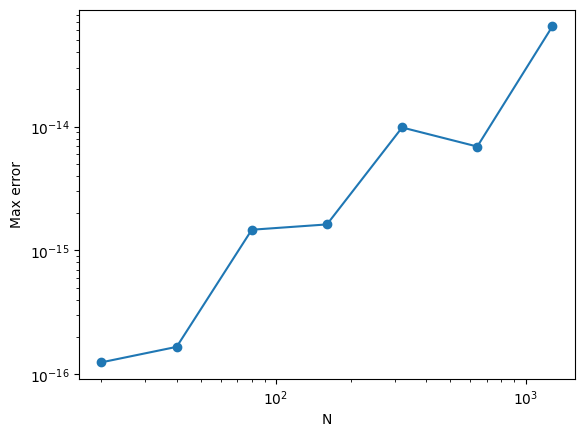

In [11]:
def u_exact_known(x):
    return 0.5 * x * (1 - x)

def f_known(x):
    return np.ones_like(x)

print("=== Test with known exact solution ===")
Ns = [20, 40, 80, 160, 320, 640, 1280]
errors_known = []

for N in Ns:
    x, u = solve_bvp(N, f_known)
    u_ex = u_exact_known(x)
    err = np.max(np.abs(u - u_ex))
    errors_known.append(err)
    print(f"N={N:4d}, max error = {err:.3e}")

plt.loglog(Ns, errors_known, marker='o')
plt.xlabel("N")
plt.ylabel("Max error")
plt.show()

測試完後，接著可以來解題目要求的

$-u'' = e^{sin (x)}$


=== Actual BVP: -u'' = e^{sin x} ===
N=  20, max error = 4.078e-01
N=  40, max error = 4.080e-01
N=  80, max error = 4.080e-01
N= 160, max error = 4.080e-01
N= 320, max error = 4.080e-01
N= 640, max error = 4.080e-01
N=1280, max error = 4.080e-01


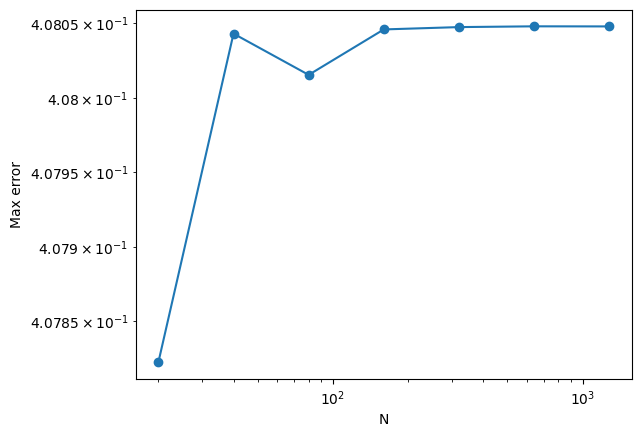

In [14]:
def f_actual(x):
    return np.exp(np.sin(x))

def reference_solution(x):
    xx = np.linspace(0, 1, 30000)
    f = np.exp(np.sin(xx))
    F = np.cumsum(f) * (xx[1] - xx[0])
    U = np.cumsum(F) * (xx[1] - xx[0])
    U = U - U[-1] * xx
    return np.interp(x, xx, U)

print("\n=== Actual BVP: -u'' = e^{sin x} ===")
errors_actual = []

for N in Ns:
    x, u = solve_bvp(N, f_actual)
    u_ref = reference_solution(x)
    err = np.max(np.abs(u - u_ref))
    errors_actual.append(err)
    print(f"N={N:4d}, max error = {err:.3e}")

plt.loglog(Ns, errors_actual, marker='o')
plt.xlabel("N")
plt.ylabel("Max error")
plt.show()


2. Consider the nonlinear boundary value problem:

$-u'' + \sin(u) = 0, \quad u(0)=1, \quad u(1)=1.$

Solve the problem and check the accuracy of your solutions.


=== Actual BVP: -u'' = e^{sin x} ===
N=  20, max error = 1.200e-01
N=  40, max error = 1.199e-01
N=  80, max error = 1.200e-01
N= 160, max error = 1.200e-01
N= 320, max error = 1.200e-01
N= 640, max error = 1.200e-01
N=1280, max error = 1.200e-01


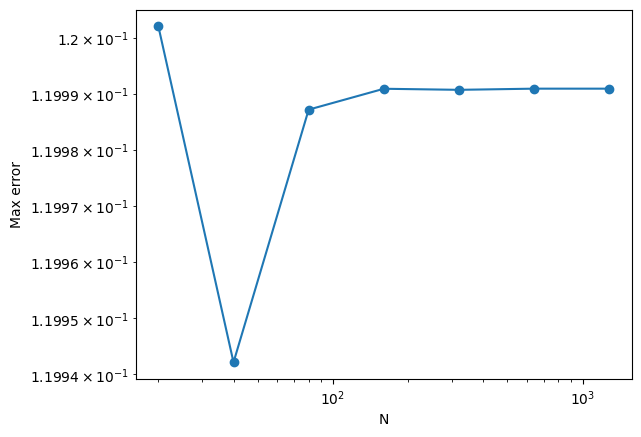

In [16]:
def f_actual(x):
    return -(np.sin(x))

def reference_solution(x):
    xx = np.linspace(0, 1, 30000)
    f = -(np.sin(xx))
    F = np.cumsum(f) * (xx[1] - xx[0])
    U = np.cumsum(F) * (xx[1] - xx[0])
    U = U - U[-1] * xx
    return np.interp(x, xx, U)

print("\n=== Actual BVP: -u'' = e^{sin x} ===")
errors_actual = []

for N in Ns:
    x, u = solve_bvp(N, f_actual)
    u_ref = reference_solution(x)
    err = np.max(np.abs(u - u_ref))
    errors_actual.append(err)
    print(f"N={N:4d}, max error = {err:.3e}")

plt.loglog(Ns, errors_actual, marker='o')
plt.xlabel("N")
plt.ylabel("Max error")
plt.show()